In [1]:
import pandas as pd
mobile = pd.read_csv("C:/Users/gayus/OneDrive/Desktop/Master Course/NDSC/mobile_data_info_train_competition.csv")
mobile_test= pd.read_csv("C:/Users/gayus/OneDrive/Desktop/Master Course/NDSC/mobile_data_info_val_competition.csv")
mobile.shape

(160330, 14)

In [2]:
mobile.head()

itemid                                              title  \
0  2346660  apple iphone 4s back glass spare part original...   
1  2816338                               iphone 4s 64gb white   
2  2847602                    samsung sm b310e piton dual sim   
3  3116949      samsung caramel gt e1272 dual sim 32 mb putih   
4  3794648                 garskin sony experia z z1 z2 ultra   

                                          image_path  Operating System  \
0  mobile_image/a9c8f0fdd6587deed197634066cf7eee.jpg               NaN   
1  mobile_image/3b9a11608551b11b9330268e0d055e01.jpg               NaN   
2  mobile_image/1d719e936841a83c165da620f927de68.jpg               NaN   
3  mobile_image/1d35a74d90df6cf4a02e6a5df9e9ff29.jpg               NaN   
4  mobile_image/5556577b09539a9c0db0d00e0f171e2d.jpg               6.0   

   Features  Network Connections  Memory RAM  Brand  Warranty Period  \
0       NaN                  NaN         NaN    2.0              NaN   
1       NaN                  NaN         NaN    2.0              NaN   
2       NaN                  NaN         NaN   43.0             13.0   
3       NaN                  NaN         NaN   43.0             13.0   
4       NaN                  0.0         NaN   38.0              NaN   

   Storage Capacity  Color Family  Phone Model  Camera  Phone Screen Size  
0               NaN          12.0       1526.0     NaN                NaN  
1               3.0          12.0          NaN     NaN                NaN  
2               NaN          12.0          NaN     NaN                NaN  
3               NaN          12.0          NaN     NaN                NaN  
4               NaN           NaN          NaN     NaN                NaN

In [3]:
#remove missing values from operating system
#first predict the operating system 
from io import StringIO

os = ['title', 'Operating System']
mobile_os = mobile[os]

#remove missing values
mobile_os = mobile_os[pd.notnull(mobile_os['Operating System'])]
#rename operating system w/o space
mobile_os = mobile_os.rename({'Operating System':'OperatingSystem'}, axis='columns')
mobile_os = mobile_os[['title', 'OperatingSystem']].sort_values('OperatingSystem')
mobile_os_id = dict(mobile_os.values)

In [4]:
#check mobile_os
mobile_os.head()

title  OperatingSystem
24490   diskon baterai battery nokia asha 225 bp 4ul b...              0.0
60281                     touchscreen nokia asha 300 n300              0.0
153503          nokia asha 305 dualsim baru 100 stok lama              0.0
90315                    nokia asha 305 original bersegel              0.0
66675   nokia asha 205 depan belakang keypad original ...              0.0

In [5]:
#note that there are much more entries from OS = 6.0

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,6))
mobile_os.groupby(['OperatingSystem'])['title'].count().plot.bar(ylim = 0)
plt.show()

<Figure size 800x600 with 1 Axes>

In [6]:
#use multinomialNB to train model

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

y = mobile_os['OperatingSystem']
X = mobile_os['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))


#micro avg - 0.95
#macro avg - 0.63


             precision    recall  f1-score   support

        0.0       0.91      0.91      0.91        66
        1.0       0.86      0.90      0.88      2179
        2.0       0.87      0.50      0.64        96
        3.0       0.86      0.82      0.84       615
        4.0       0.00      0.00      0.00         1
        5.0       0.00      0.00      0.00        18
        6.0       0.97      0.97      0.97     15137

avg / total       0.95      0.96      0.95     18112

[[   60     0     0     0     0     0     6]
 [    0  1954     0     3     0     0   222]
 [    1     2    48     0     0     0    45]
 [    0    11     2   505     0     0    97]
 [    0     0     0     0     0     0     1]
 [    0     0     0     0     0     0    18]
 [    5   316     5    81     0     0 14730]]


C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
#use LinearSVC
from sklearn.svm import LinearSVC

algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print(classification_report(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))


#micro avg - 0.97
#macro avg - 0.85
#higher recall for minority group

             precision    recall  f1-score   support

        0.0       0.95      0.95      0.95        66
        1.0       0.92      0.92      0.92      2179
        2.0       0.94      0.76      0.84        96
        3.0       0.94      0.85      0.89       615
        4.0       0.50      1.00      0.67         1
        5.0       0.80      0.44      0.57        18
        6.0       0.98      0.99      0.98     15137

avg / total       0.97      0.97      0.97     18112

[[   63     0     0     0     0     0     3]
 [    0  2007     0     2     0     0   170]
 [    0     0    73     0     0     0    23]
 [    0    10     0   521     0     0    84]
 [    0     0     0     0     1     0     0]
 [    0     0     0     0     0     8    10]
 [    3   165     5    29     1     2 14932]]


In [8]:
from sklearn.ensemble import RandomForestClassifier

algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

#note that for category 4: there were no test data available to validate
#micro avg - 0.97
#macro avg - 0.82

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


             precision    recall  f1-score   support

        0.0       0.98      0.95      0.97        66
        1.0       0.91      0.92      0.92      2179
        2.0       0.90      0.80      0.85        96
        3.0       0.94      0.81      0.87       615
        4.0       0.50      1.00      0.67         1
        5.0       1.00      0.44      0.62        18
        6.0       0.98      0.98      0.98     15137

avg / total       0.97      0.97      0.97     18112

[[   63     0     1     0     0     0     2]
 [    0  2010     0     1     0     0   168]
 [    0     0    77     1     0     0    18]
 [    0     7     0   498     0     0   110]
 [    0     0     0     0     1     0     0]
 [    0     1     0     0     0     8     9]
 [    1   196     8    29     1     0 14902]]


# Operating System

In [9]:
A = mobile_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Operating System'}, axis='columns')
mobile_test_1=pd.concat([mobile_test, new_1], axis=1)
mobile_test_1

itemid                                              title  \
0      1520485457        new promo iphone 5s 16gb gold ex resmi ibox   
1      1520516704          new promo xiaomi note 5a prime 3 32gb tam   
2      1520726573    big produk super murah oppo f5 4gb 32gb fullset   
3      1523303826              pocophone xiaomi f1 ram 6gb rom 128gb   
4      1524467616                                           advan g2   
5      1524876429                                  samsung galaxy a6   
6      1525744340  promo akhir bulan oppo f7 diamond black limite...   
7      1529179598                     vivo v9 pro ram 6gb rom 64gb 6   
8      1529634640  unik telephone panasonic wireless kx tg1611 bl...   
9      1529634708  promo telepon wireless panasonic kx tg1611 all...   
10     1535594128  big promo terbaru baru diskon 55 samsung galax...   
11     1536913818                               aldo al007 ht antena   
12     1537000139                   nokia 216 dual sim garansi resmi   
13     1539694249    promo samsung original galaxy s4 earphone white   
14     1539930818  promo hari jadi toko kami stock terbatas asus ...   
15     1539935384  promo hari jadi toko kami stock terbatas iphon...   
16     1541268292                   lcd asus t00n original padfone s   
17     1541736960  terlaris asli meizu m2 note 4g fdd lte dual si...   
18     1541759005                                      promo nokia 3   
19     1543195129                                advan s5e full view   
20     1544282937                       moshi iphone 6 6s sensecover   
21     1546128724  big sale laris iphone 6 16gb gold garansi dist...   
22     1548186789                                iphone 6s 64gb gold   
23     1549681613  bestproduct stainless connector adapter for sa...   
24     1551600002  usb cable lighting kabel data iphone 5 6 origi...   
25     1551898546                usb port penutup sony xperia z1 ori   
26     1555335464                                 xiomi redmi 5 3 32   
27     1557002061  anker powerline lightning mfi certified cable ...   
28     1557042701  handsfree headset earpods iphone 8 plus x orig...   
29     1557837884          promo xiaomi mi a2 androidone ready stock   
...           ...                                                ...   
40387  1216935158                                 oppo r11s new bnib   
40388   311199291                oppo a39 gold ram 3gb internal 32gb   
40389  1694824763  nokia 6 4g lte ram 3gb rom 32gb segel murah ga...   
40390  1034284267  ready stock sharp r1 5.2 ips hd 3 32gb 13 8 mp...   
40391  1059390085                    promo infinix hot s3 topaz blue   
40392  1839788366                  iphone 7 gold 32gb garansi 1tahun   
40393   704126195  evercoss genpro z 4g lte ram 4gb 32gb garansi ...   
40394  1210020180  diskon15 infinix hot s3 3 32gb layar 18:9 self...   
40395  1568003530  diskon 50 cuci gudang asus zenfone 5q 4 64 zc6...   
40396  1186786053           sharp m1 aquos 4g lte ram 3gb 64gb resmi   
40397  1822896387  asus zenfone max m2 3gb 32gb zb633kl midnight ...   
40398   919038573  minat serius chat di wa 083123426159 iphone 5s...   
40399  1839836526  big promo add whatshap 0821 9127 5399 iphone 7...   
40400  1397082442  ready samsung galaxy j8 2018 edition gold gara...   
40401  1740028202  promo xiaomi mi a2 prime ram 6gb internal 128g...   
40402   349452481  asus zenfone zoom s ze553kl free tongsis rings...   
40403  1098672042  unik xiaomi mi a1 4g lte ram 4gb 64gb black ga...   
40404  1761239629  big promo akhir tahun distributor asus zenfone...   
40405  1839767194                   iphone 7 red 32gb garansi 1tahun   
40406   976294675                     vivo y69 ram 3gb rom 32gb 4lte   
40407  1388680945  super sale agustus samsung galaxy a8 star 2018...   
40408   966489015                  oppo f5 4 32 gold garansi 1 tahun   
40409  1013677956  bli 2 gratis 1 wa 082292409969 vivo v7 gold ra...   
40410  1038729298  promo cuci gudang spesial gudan 

# FEATURES

In [10]:
#remove missing values from FEATURES
from io import StringIO

ft = ['title', 'Features']
mobile_ft = mobile[ft]

#remove missing values
mobile_ft = mobile_ft[pd.notnull(mobile_ft['Features'])]
mobile_ft = mobile_ft[['title', 'Features']].sort_values('Features')
mobile_ft_id = dict(mobile_ft.values)
mobile_ft.head()

title  Features
5                         lcd xiaomi redmi 4+touchscreen       0.0
82623  free ongkir lcd touchscreen asus zenpad c 7 0 ...       0.0
82614  wa 081247015661 ready touchscreen asus fonepad...       0.0
82591                        touchscreen nokia 620 black       0.0
82588  lcd touchscreen sony xperia z3 mini compact d5...       0.0

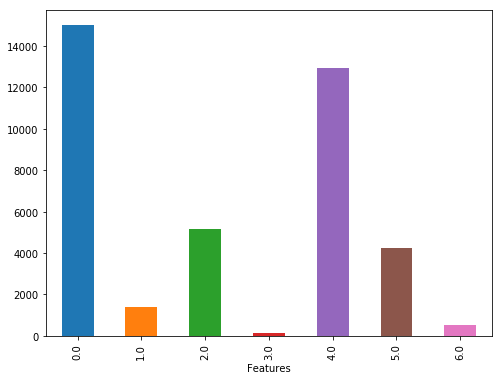

In [11]:
#more 0 and 4
fig = plt.figure(figsize = (8,6))
mobile_ft.groupby(['Features'])['title'].count().plot.bar(ylim = 0)
plt.show()

In [12]:
#MultinomialNB

y = mobile_ft['Features']
X = mobile_ft['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
print(confusion_matrix(y_test,y_pred_nb), "\n")

#micro avg - 0.72
#macro avg - 0.74

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
print(confusion_matrix(y_test,y_pred_svc), "\n")

#micro avg - 0.74
#macro avg - 0.77
#highest recall score for minority groups

#RandomForestClassifier

algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
print(confusion_matrix(y_test,y_pred_rf))

#micro avg - 0.75
#macro avg - 0.76

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.71      0.75      0.73      5949
        1.0       0.73      0.55      0.62       564
        2.0       0.81      0.71      0.75      2111
        3.0       1.00      0.08      0.14        53
        4.0       0.69      0.77      0.73      5189
        5.0       0.77      0.65      0.70      1665
        6.0       0.68      0.09      0.16       207

avg / total       0.73      0.72      0.72     15738
 

[[4458   31  162    0 1162  135    1]
 [ 113  309   18    0  105   17    2]
 [ 303   11 1491    0  237   69    0]
 [  14    0   12    4    4   19    0]
 [1042   24   63    0 3995   61    4]
 [ 282   23   78    0  204 1076    2]
 [  70   28   18    0   57   15   19]] 

LinearSVC
             precision    recall  f1-score   support

        0.0       0.73      0.78      0.75      5949
        1.0       0.88      0.62      0.72       564
        2.0       0.84      0.73      0.78      2111
        3.0

In [13]:
A = mobile_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Features'}, axis='columns')
mobile_test_2=pd.concat([mobile_test_1, new_1], axis=1)
mobile_test_2

itemid                                              title  \
0      1520485457        new promo iphone 5s 16gb gold ex resmi ibox   
1      1520516704          new promo xiaomi note 5a prime 3 32gb tam   
2      1520726573    big produk super murah oppo f5 4gb 32gb fullset   
3      1523303826              pocophone xiaomi f1 ram 6gb rom 128gb   
4      1524467616                                           advan g2   
5      1524876429                                  samsung galaxy a6   
6      1525744340  promo akhir bulan oppo f7 diamond black limite...   
7      1529179598                     vivo v9 pro ram 6gb rom 64gb 6   
8      1529634640  unik telephone panasonic wireless kx tg1611 bl...   
9      1529634708  promo telepon wireless panasonic kx tg1611 all...   
10     1535594128  big promo terbaru baru diskon 55 samsung galax...   
11     1536913818                               aldo al007 ht antena   
12     1537000139                   nokia 216 dual sim garansi resmi   
13     1539694249    promo samsung original galaxy s4 earphone white   
14     1539930818  promo hari jadi toko kami stock terbatas asus ...   
15     1539935384  promo hari jadi toko kami stock terbatas iphon...   
16     1541268292                   lcd asus t00n original padfone s   
17     1541736960  terlaris asli meizu m2 note 4g fdd lte dual si...   
18     1541759005                                      promo nokia 3   
19     1543195129                                advan s5e full view   
20     1544282937                       moshi iphone 6 6s sensecover   
21     1546128724  big sale laris iphone 6 16gb gold garansi dist...   
22     1548186789                                iphone 6s 64gb gold   
23     1549681613  bestproduct stainless connector adapter for sa...   
24     1551600002  usb cable lighting kabel data iphone 5 6 origi...   
25     1551898546                usb port penutup sony xperia z1 ori   
26     1555335464                                 xiomi redmi 5 3 32   
27     1557002061  anker powerline lightning mfi certified cable ...   
28     1557042701  handsfree headset earpods iphone 8 plus x orig...   
29     1557837884          promo xiaomi mi a2 androidone ready stock   
...           ...                                                ...   
40387  1216935158                                 oppo r11s new bnib   
40388   311199291                oppo a39 gold ram 3gb internal 32gb   
40389  1694824763  nokia 6 4g lte ram 3gb rom 32gb segel murah ga...   
40390  1034284267  ready stock sharp r1 5.2 ips hd 3 32gb 13 8 mp...   
40391  1059390085                    promo infinix hot s3 topaz blue   
40392  1839788366                  iphone 7 gold 32gb garansi 1tahun   
40393   704126195  evercoss genpro z 4g lte ram 4gb 32gb garansi ...   
40394  1210020180  diskon15 infinix hot s3 3 32gb layar 18:9 self...   
40395  1568003530  diskon 50 cuci gudang asus zenfone 5q 4 64 zc6...   
40396  1186786053           sharp m1 aquos 4g lte ram 3gb 64gb resmi   
40397  1822896387  asus zenfone max m2 3gb 32gb zb633kl midnight ...   
40398   919038573  minat serius chat di wa 083123426159 iphone 5s...   
40399  1839836526  big promo add whatshap 0821 9127 5399 iphone 7...   
40400  1397082442  ready samsung galaxy j8 2018 edition gold gara...   
40401  1740028202  promo xiaomi mi a2 prime ram 6gb internal 128g...   
40402   349452481  asus zenfone zoom s ze553kl free tongsis rings...   
40403  1098672042  unik xiaomi mi a1 4g lte ram 4gb 64gb black ga...   
40404  1761239629  big promo akhir tahun distributor asus zenfone...   
40405  1839767194                   iphone 7 red 32gb garansi 1tahun   
40406   976294675                     vivo y69 ram 3gb rom 32gb 4lte   
40407  1388680945  super sale agustus samsung galaxy a8 star 2018...   
40408   966489015                  oppo f5 4 32 gold garansi 1 tahun   
40409  1013677956  bli 2 gratis 1 wa 082292409969 vivo v7 gold ra...   
40410  1038729298  promo cuci gudang spesial gudan 

# NETWORK CONNECTIONS

In [14]:
#remove missing values from FEATURES
from io import StringIO

nc = ['title', 'Network Connections']
mobile_nc = mobile[nc]

#remove missing values
mobile_nc = mobile_nc[pd.notnull(mobile_nc['Network Connections'])]

#rename w/o space
mobile_nc = mobile_nc.rename({'Network Connections':'NetworkConnections'}, axis='columns')
mobile_nc = mobile_nc[['title', 'NetworkConnections']].sort_values('NetworkConnections')
mobile_nc_id = dict(mobile_nc.values)
mobile_nc.head()

title  NetworkConnections
4                     garskin sony experia z z1 z2 ultra                 0.0
99646  oppo f1s selfie expert new gratis bonus powerb...                 0.0
99645  promo beli 2 gratis 1 vivo y55s 16gb 13mp came...                 0.0
99640    samsung galaxy a8 2018 a530 4 32 gb 4g lte grey                 0.0
99630              xiomi redmi 5a 2 16 garansi resmi tam                 0.0

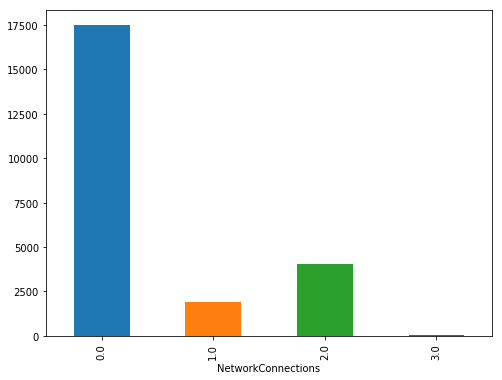

In [15]:
#more 0
fig = plt.figure(figsize = (8,6))
mobile_nc.groupby(['NetworkConnections'])['title'].count().plot.bar(ylim = 0)
plt.show()

In [16]:
#MultinomialNB

y = mobile_nc['NetworkConnections']
X = mobile_nc['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
print(confusion_matrix(y_test,y_pred_nb), "\n")

#micro avg - 0.89
#macro avg - 0.64

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
print(confusion_matrix(y_test,y_pred_svc), "\n")

#micro avg - 0.91
#macro avg - 0.91
#highest recall score for minority group

#RandomForestClassifier

algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
print(confusion_matrix(y_test,y_pred_rf))

#micro avg - 0.90
#macro avg - 0.91

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94      6956
        1.0       0.85      0.77      0.81       770
        2.0       0.82      0.59      0.69      1630
        3.0       0.00      0.00      0.00        14

avg / total       0.89      0.89      0.88      9370
 

[[6798   43  115    0]
 [  97  592   81    0]
 [ 613   59  958    0]
 [   6    0    8    0]] 



C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.94      6956
        1.0       0.89      0.78      0.83       770
        2.0       0.81      0.66      0.73      1630
        3.0       1.00      0.21      0.35        14

avg / total       0.90      0.90      0.90      9370
 

[[6767   26  163    0]
 [  98  597   75    0]
 [ 510   48 1072    0]
 [   4    1    6    3]] 

Random Forest Classifier
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94      6956
        1.0       0.88      0.76      0.82       770
        2.0       0.87      0.62      0.72      1630
        3.0       1.00      0.29      0.44        14

avg / total       0.90      0.90      0.89      9370
 

[[6841   29   86    0]
 [ 130  584   56    0]
 [ 578   49 1003    0]
 [   8    0    2    4]]


In [17]:
A = mobile_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Network Connections'}, axis='columns')
mobile_test_3=pd.concat([mobile_test_2, new_1], axis=1)
mobile_test_3

itemid                                              title  \
0      1520485457        new promo iphone 5s 16gb gold ex resmi ibox   
1      1520516704          new promo xiaomi note 5a prime 3 32gb tam   
2      1520726573    big produk super murah oppo f5 4gb 32gb fullset   
3      1523303826              pocophone xiaomi f1 ram 6gb rom 128gb   
4      1524467616                                           advan g2   
5      1524876429                                  samsung galaxy a6   
6      1525744340  promo akhir bulan oppo f7 diamond black limite...   
7      1529179598                     vivo v9 pro ram 6gb rom 64gb 6   
8      1529634640  unik telephone panasonic wireless kx tg1611 bl...   
9      1529634708  promo telepon wireless panasonic kx tg1611 all...   
10     1535594128  big promo terbaru baru diskon 55 samsung galax...   
11     1536913818                               aldo al007 ht antena   
12     1537000139                   nokia 216 dual sim garansi resmi   
13     1539694249    promo samsung original galaxy s4 earphone white   
14     1539930818  promo hari jadi toko kami stock terbatas asus ...   
15     1539935384  promo hari jadi toko kami stock terbatas iphon...   
16     1541268292                   lcd asus t00n original padfone s   
17     1541736960  terlaris asli meizu m2 note 4g fdd lte dual si...   
18     1541759005                                      promo nokia 3   
19     1543195129                                advan s5e full view   
20     1544282937                       moshi iphone 6 6s sensecover   
21     1546128724  big sale laris iphone 6 16gb gold garansi dist...   
22     1548186789                                iphone 6s 64gb gold   
23     1549681613  bestproduct stainless connector adapter for sa...   
24     1551600002  usb cable lighting kabel data iphone 5 6 origi...   
25     1551898546                usb port penutup sony xperia z1 ori   
26     1555335464                                 xiomi redmi 5 3 32   
27     1557002061  anker powerline lightning mfi certified cable ...   
28     1557042701  handsfree headset earpods iphone 8 plus x orig...   
29     1557837884          promo xiaomi mi a2 androidone ready stock   
...           ...                                                ...   
40387  1216935158                                 oppo r11s new bnib   
40388   311199291                oppo a39 gold ram 3gb internal 32gb   
40389  1694824763  nokia 6 4g lte ram 3gb rom 32gb segel murah ga...   
40390  1034284267  ready stock sharp r1 5.2 ips hd 3 32gb 13 8 mp...   
40391  1059390085                    promo infinix hot s3 topaz blue   
40392  1839788366                  iphone 7 gold 32gb garansi 1tahun   
40393   704126195  evercoss genpro z 4g lte ram 4gb 32gb garansi ...   
40394  1210020180  diskon15 infinix hot s3 3 32gb layar 18:9 self...   
40395  1568003530  diskon 50 cuci gudang asus zenfone 5q 4 64 zc6...   
40396  1186786053           sharp m1 aquos 4g lte ram 3gb 64gb resmi   
40397  1822896387  asus zenfone max m2 3gb 32gb zb633kl midnight ...   
40398   919038573  minat serius chat di wa 083123426159 iphone 5s...   
40399  1839836526  big promo add whatshap 0821 9127 5399 iphone 7...   
40400  1397082442  ready samsung galaxy j8 2018 edition gold gara...   
40401  1740028202  promo xiaomi mi a2 prime ram 6gb internal 128g...   
40402   349452481  asus zenfone zoom s ze553kl free tongsis rings...   
40403  1098672042  unik xiaomi mi a1 4g lte ram 4gb 64gb black ga...   
40404  1761239629  big promo akhir tahun distributor asus zenfone...   
40405  1839767194                   iphone 7 red 32gb garansi 1tahun   
40406   976294675                     vivo y69 ram 3gb rom 32gb 4lte   
40407  1388680945  super sale agustus samsung galaxy a8 star 2018...   
40408   966489015                  oppo f5 4 32 gold garansi 1 tahun   
40409  1013677956  bli 2 gratis 1 wa 082292409969 vivo v7 gold ra...   
40410  1038729298  promo cuci gudang spesial gudan 

# MEMORY RAM

In [18]:
mr = ['title', 'Memory RAM']
mobile_mr = mobile[mr]

#remove missing values
mobile_mr = mobile_mr[pd.notnull(mobile_mr['Memory RAM'])]

#rename w/o space
mobile_mr = mobile_mr.rename({'Memory RAM':'MemoryRAM'}, axis='columns')
mobile_mr = mobile_mr[['title', 'MemoryRAM']].sort_values('MemoryRAM')
mobile_mr_id = dict(mobile_mr.values)
mobile_mr.head()

title  MemoryRAM
124725                          new promo lg x240 k8 gold        0.0
11749                  gratis ongkir samsung j2 pro hitam        0.0
52520                              samsung j2 prime black        0.0
12837   promo big saleh samsung galaxy j5 j500 1.5 ram...        0.0
125812  promo thn 2018 beli 2 gratis 1 wa ke 081346637...        0.0

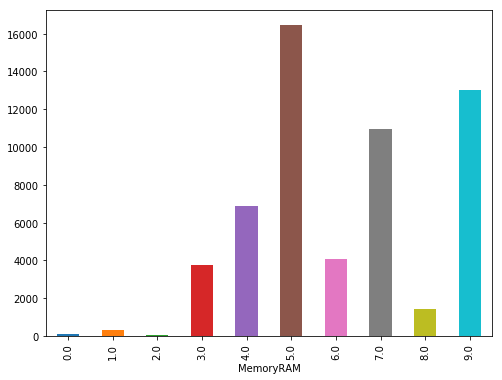

In [19]:
#more 5, 9
fig = plt.figure(figsize = (8,6))
mobile_mr.groupby(['MemoryRAM'])['title'].count().plot.bar(ylim = 0)
plt.show()

In [20]:
##### MultinomialNB

y = mobile_mr['MemoryRAM']
X = mobile_mr['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
print(confusion_matrix(y_test,y_pred_nb), "\n")

#micro avg - 0.84
#macro avg - 0.75

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
print(confusion_matrix(y_test,y_pred_svc), "\n")

#micro avg - 0.88
#macro avg - 0.87
#highest recall score for minority groups

#RandomForestClassifier

algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
print(confusion_matrix(y_test,y_pred_rf))

#micro avg - 0.87
#macro avg - 0.81

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.50      0.02      0.04        43
        1.0       0.79      0.20      0.32       111
        2.0       0.56      0.16      0.24        32
        3.0       0.75      0.76      0.76      1537
        4.0       0.88      0.86      0.87      2760
        5.0       0.87      0.89      0.88      6553
        6.0       0.83      0.64      0.72      1621
        7.0       0.82      0.89      0.85      4384
        8.0       0.67      0.61      0.64       574
        9.0       0.84      0.86      0.85      5200

avg / total       0.84      0.84      0.84     22815
 

[[   1    0    0   17    2    6    0    0    1   16]
 [   0   22    0   33    0    6    6    5   25   14]
 [   0    0    5    5    6    8    0    2    6    0]
 [   0    2    0 1169   64   51   26   42   75  108]
 [   0    0    0   26 2383  216    7   88    2   38]
 [   1    1    3   92  143 5823   32  256   29  173]
 [   0    0    0   33   15

In [21]:
A = mobile_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Memory RAM'}, axis='columns')
mobile_test_4=pd.concat([mobile_test_3, new_1], axis=1)
mobile_test_4

itemid                                              title  \
0      1520485457        new promo iphone 5s 16gb gold ex resmi ibox   
1      1520516704          new promo xiaomi note 5a prime 3 32gb tam   
2      1520726573    big produk super murah oppo f5 4gb 32gb fullset   
3      1523303826              pocophone xiaomi f1 ram 6gb rom 128gb   
4      1524467616                                           advan g2   
5      1524876429                                  samsung galaxy a6   
6      1525744340  promo akhir bulan oppo f7 diamond black limite...   
7      1529179598                     vivo v9 pro ram 6gb rom 64gb 6   
8      1529634640  unik telephone panasonic wireless kx tg1611 bl...   
9      1529634708  promo telepon wireless panasonic kx tg1611 all...   
10     1535594128  big promo terbaru baru diskon 55 samsung galax...   
11     1536913818                               aldo al007 ht antena   
12     1537000139                   nokia 216 dual sim garansi resmi   
13     1539694249    promo samsung original galaxy s4 earphone white   
14     1539930818  promo hari jadi toko kami stock terbatas asus ...   
15     1539935384  promo hari jadi toko kami stock terbatas iphon...   
16     1541268292                   lcd asus t00n original padfone s   
17     1541736960  terlaris asli meizu m2 note 4g fdd lte dual si...   
18     1541759005                                      promo nokia 3   
19     1543195129                                advan s5e full view   
20     1544282937                       moshi iphone 6 6s sensecover   
21     1546128724  big sale laris iphone 6 16gb gold garansi dist...   
22     1548186789                                iphone 6s 64gb gold   
23     1549681613  bestproduct stainless connector adapter for sa...   
24     1551600002  usb cable lighting kabel data iphone 5 6 origi...   
25     1551898546                usb port penutup sony xperia z1 ori   
26     1555335464                                 xiomi redmi 5 3 32   
27     1557002061  anker powerline lightning mfi certified cable ...   
28     1557042701  handsfree headset earpods iphone 8 plus x orig...   
29     1557837884          promo xiaomi mi a2 androidone ready stock   
...           ...                                                ...   
40387  1216935158                                 oppo r11s new bnib   
40388   311199291                oppo a39 gold ram 3gb internal 32gb   
40389  1694824763  nokia 6 4g lte ram 3gb rom 32gb segel murah ga...   
40390  1034284267  ready stock sharp r1 5.2 ips hd 3 32gb 13 8 mp...   
40391  1059390085                    promo infinix hot s3 topaz blue   
40392  1839788366                  iphone 7 gold 32gb garansi 1tahun   
40393   704126195  evercoss genpro z 4g lte ram 4gb 32gb garansi ...   
40394  1210020180  diskon15 infinix hot s3 3 32gb layar 18:9 self...   
40395  1568003530  diskon 50 cuci gudang asus zenfone 5q 4 64 zc6...   
40396  1186786053           sharp m1 aquos 4g lte ram 3gb 64gb resmi   
40397  1822896387  asus zenfone max m2 3gb 32gb zb633kl midnight ...   
40398   919038573  minat serius chat di wa 083123426159 iphone 5s...   
40399  1839836526  big promo add whatshap 0821 9127 5399 iphone 7...   
40400  1397082442  ready samsung galaxy j8 2018 edition gold gara...   
40401  1740028202  promo xiaomi mi a2 prime ram 6gb internal 128g...   
40402   349452481  asus zenfone zoom s ze553kl free tongsis rings...   
40403  1098672042  unik xiaomi mi a1 4g lte ram 4gb 64gb black ga...   
40404  1761239629  big promo akhir tahun distributor asus zenfone...   
40405  1839767194                   iphone 7 red 32gb garansi 1tahun   
40406   976294675                     vivo y69 ram 3gb rom 32gb 4lte   
40407  1388680945  super sale agustus samsung galaxy a8 star 2018...   
40408   966489015                  oppo f5 4 32 gold garansi 1 tahun   
40409  1013677956  bli 2 gratis 1 wa 082292409969 vivo v7 gold ra...   
40410  1038729298  promo cuci gudang spesial gudan 

# BRAND

In [22]:
from io import StringIO

br = ['title', 'Brand']
mobile_br = mobile[br]

#remove missing values
mobile_br = mobile_br[pd.notnull(mobile_br['Brand'])]
mobile_br = mobile_br[['title', 'Brand']].sort_values('Brand')
mobile_br_id = dict(mobile_br.values)
mobile_br.head()

title  Brand
71948   jual ulefone armor mini ip68 tahan air outdoor...    0.0
106946  google pixel rom 32gb ram 4gb asli 100 origina...    0.0
149435  google pixel 1 ram 4 gb memori 32 putih white ...    0.0
141799  wa 082290481322 google pixel 2 xl white free f...    0.0
31780                          google pixel 2 64gb second    0.0

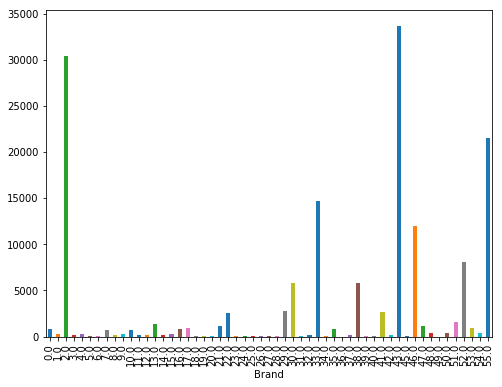

In [23]:
#popular brands - apple, samsung, oppo
fig = plt.figure(figsize = (8,6))
mobile_br.groupby(['Brand'])['title'].count().plot.bar(ylim = 0)
plt.show()

In [24]:
#MultinomialNB

y = mobile_br['Brand']
X = mobile_br['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
print(confusion_matrix(y_test,y_pred_nb), "\n")

#micro avg - 0.96
#macro avg - 0.86

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
print(confusion_matrix(y_test,y_pred_svc), "\n")

#micro avg - 0.99
#macro avg - 0.99

#RandomForestClassifier

algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
print(confusion_matrix(y_test,y_pred_rf))

#micro avg - 0.98
#macro avg - 0.96

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.89      0.48      0.62       362
        1.0       0.97      0.38      0.54        96
        2.0       0.97      0.98      0.97     12057
        3.0       1.00      0.40      0.58        42
        4.0       1.00      0.58      0.74       103
        5.0       0.00      0.00      0.00        27
        6.0       0.00      0.00      0.00        20
        7.0       0.94      0.93      0.93       281
        8.0       1.00      0.44      0.61        89
        9.0       1.00      0.76      0.86       123
       10.0       1.00      0.73      0.85       283
       11.0       0.96      0.29      0.45        85
       12.0       0.98      0.61      0.75        87
       13.0       0.99      0.92      0.95       561
       14.0       1.00      0.24      0.39        58
       15.0       1.00      0.44      0.61        93
       16.0       0.94      0.87      0.90       335
       17.0       1.00      0.

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        0.0       0.80      0.72      0.76       362
        1.0       0.97      0.99      0.98        96
        2.0       0.98      0.99      0.99     12057
        3.0       1.00      1.00      1.00        42
        4.0       1.00      0.99      1.00       103
        5.0       1.00      1.00      1.00        27
        6.0       1.00      1.00      1.00        20
        7.0       0.99      0.98      0.99       281
        8.0       1.00      1.00      1.00        89
        9.0       1.00      1.00      1.00       123
       10.0       0.98      0.97      0.98       283
       11.0       1.00      1.00      1.00        85
       12.0       1.00      0.98      0.99        87
       13.0       0.99      0.99      0.99       561
       14.0       1.00      0.98      0.99        58
       15.0       1.00      0.99      0.99        93
       16.0       0.98      0.98      0.98       335
       17.0       1.00      0.99   

In [25]:
A = mobile_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Brand'}, axis='columns')
mobile_test_5=pd.concat([mobile_test_4, new_1], axis=1)
mobile_test_5

itemid                                              title  \
0      1520485457        new promo iphone 5s 16gb gold ex resmi ibox   
1      1520516704          new promo xiaomi note 5a prime 3 32gb tam   
2      1520726573    big produk super murah oppo f5 4gb 32gb fullset   
3      1523303826              pocophone xiaomi f1 ram 6gb rom 128gb   
4      1524467616                                           advan g2   
5      1524876429                                  samsung galaxy a6   
6      1525744340  promo akhir bulan oppo f7 diamond black limite...   
7      1529179598                     vivo v9 pro ram 6gb rom 64gb 6   
8      1529634640  unik telephone panasonic wireless kx tg1611 bl...   
9      1529634708  promo telepon wireless panasonic kx tg1611 all...   
10     1535594128  big promo terbaru baru diskon 55 samsung galax...   
11     1536913818                               aldo al007 ht antena   
12     1537000139                   nokia 216 dual sim garansi resmi   
13     1539694249    promo samsung original galaxy s4 earphone white   
14     1539930818  promo hari jadi toko kami stock terbatas asus ...   
15     1539935384  promo hari jadi toko kami stock terbatas iphon...   
16     1541268292                   lcd asus t00n original padfone s   
17     1541736960  terlaris asli meizu m2 note 4g fdd lte dual si...   
18     1541759005                                      promo nokia 3   
19     1543195129                                advan s5e full view   
20     1544282937                       moshi iphone 6 6s sensecover   
21     1546128724  big sale laris iphone 6 16gb gold garansi dist...   
22     1548186789                                iphone 6s 64gb gold   
23     1549681613  bestproduct stainless connector adapter for sa...   
24     1551600002  usb cable lighting kabel data iphone 5 6 origi...   
25     1551898546                usb port penutup sony xperia z1 ori   
26     1555335464                                 xiomi redmi 5 3 32   
27     1557002061  anker powerline lightning mfi certified cable ...   
28     1557042701  handsfree headset earpods iphone 8 plus x orig...   
29     1557837884          promo xiaomi mi a2 androidone ready stock   
...           ...                                                ...   
40387  1216935158                                 oppo r11s new bnib   
40388   311199291                oppo a39 gold ram 3gb internal 32gb   
40389  1694824763  nokia 6 4g lte ram 3gb rom 32gb segel murah ga...   
40390  1034284267  ready stock sharp r1 5.2 ips hd 3 32gb 13 8 mp...   
40391  1059390085                    promo infinix hot s3 topaz blue   
40392  1839788366                  iphone 7 gold 32gb garansi 1tahun   
40393   704126195  evercoss genpro z 4g lte ram 4gb 32gb garansi ...   
40394  1210020180  diskon15 infinix hot s3 3 32gb layar 18:9 self...   
40395  1568003530  diskon 50 cuci gudang asus zenfone 5q 4 64 zc6...   
40396  1186786053           sharp m1 aquos 4g lte ram 3gb 64gb resmi   
40397  1822896387  asus zenfone max m2 3gb 32gb zb633kl midnight ...   
40398   919038573  minat serius chat di wa 083123426159 iphone 5s...   
40399  1839836526  big promo add whatshap 0821 9127 5399 iphone 7...   
40400  1397082442  ready samsung galaxy j8 2018 edition gold gara...   
40401  1740028202  promo xiaomi mi a2 prime ram 6gb internal 128g...   
40402   349452481  asus zenfone zoom s ze553kl free tongsis rings...   
40403  1098672042  unik xiaomi mi a1 4g lte ram 4gb 64gb black ga...   
40404  1761239629  big promo akhir tahun distributor asus zenfone...   
40405  1839767194                   iphone 7 red 32gb garansi 1tahun   
40406   976294675                     vivo y69 ram 3gb rom 32gb 4lte   
40407  1388680945  super sale agustus samsung galaxy a8 star 2018...   
40408   966489015                  oppo f5 4 32 gold garansi 1 tahun   
40409  1013677956  bli 2 gratis 1 wa 082292409969 vivo v7 gold ra...   
40410  1038729298  promo cuci gudang spesial gudan 

# PHONE MODEL

In [26]:
pm = ['title', 'Phone Model']
mobile_pm = mobile[pm]

#remove missing values
mobile_pm = mobile_pm[pd.notnull(mobile_pm['Phone Model'])]

#rename w/o space
mobile_pm = mobile_pm.rename({'Phone Model':'PhoneModel'}, axis='columns')
mobile_pm = mobile_pm[['title', 'PhoneModel']].sort_values('PhoneModel')
mobile_pm_id = dict(mobile_pm.values)
mobile_pm.head()

title  PhoneModel
103348  big promo sony xperia xa ultra dual f3216 bran...         0.0
117865  promo cuci gudang khusus days of love beli 2 g...         0.0
95963                                sony xperia xa ultra         0.0
35813   original kamera depan sony xperia xa ultra f32...         0.0
114622                               sony xperia xa ultra         0.0

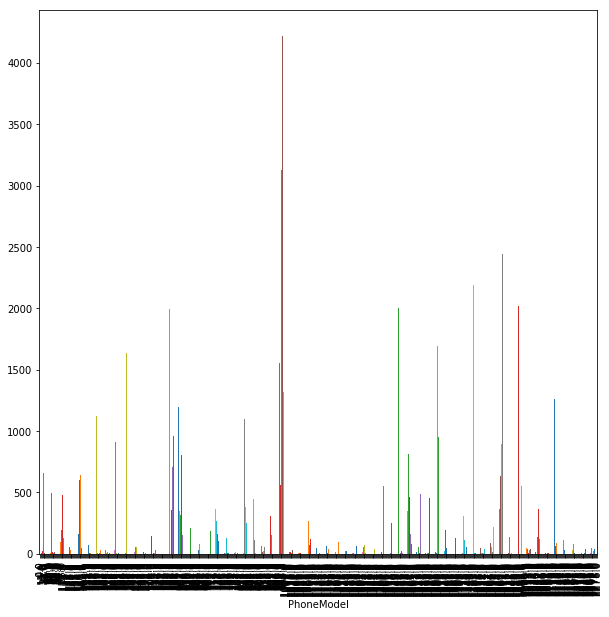

In [27]:
#too many categories
fig = plt.figure(figsize = (10,10))
mobile_pm.groupby(['PhoneModel'])['title'].count().plot.bar(ylim = 0)
plt.show()

In [28]:
mobile_pm_count = pd.DataFrame(mobile_pm.groupby('PhoneModel').size())
pd.set_option('display.max_rows', 1000)
mobile_pm_count.shape
#there are 619 categories


(619, 1)

In [29]:
#MultinomialNB

y = mobile_pm['PhoneModel']
X = mobile_pm['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#micro avg - 0.71
#macro avg - 0.39

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#micro avg - 0.93
#macro avg - 0.78

#RandomForestClassifier

algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#micro avg - 0.91
#macro avg - 0.64

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       1.00      0.04      0.08        25
        4.0       1.00      0.25      0.40         4
       12.0       0.00      0.00      0.00         2
       15.0       0.00      0.00      0.00        10
       19.0       1.00      0.62      0.76       256
       21.0       0.00      0.00      0.00         2
       22.0       0.00      0.00      0.00         2
       27.0       0.00      0.00      0.00         6
       29.0       0.00      0.00      0.00         1
       30.0       0.00      0.00      0.00         3
       33.0       1.00      0.57      0.73        40
       39.0       0.63      0.87      0.73        62
       44.0       0.00      0.00      0.00         1
       49.0       0.88      0.94      0.91       178
       60.0       0.00      0.00      0.00         2
       69.0       0.00      0.00      0.00         4
       70.0       1.00      0.31      0.48        16
       90.0       1.00      0.

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98        25
        4.0       1.00      1.00      1.00         4
       12.0       0.67      1.00      0.80         2
       15.0       1.00      1.00      1.00        10
       19.0       1.00      0.99      1.00       256
       21.0       1.00      1.00      1.00         2
       22.0       0.00      0.00      0.00         2
       27.0       0.50      0.17      0.25         6
       29.0       0.00      0.00      0.00         1
       30.0       0.50      0.33      0.40         3
       33.0       1.00      0.97      0.99        40
       39.0       0.98      1.00      0.99        62
       44.0       1.00      1.00      1.00         1
       49.0       1.00      0.99      0.99       178
       60.0       1.00      1.00      1.00         2
       69.0       1.00      1.00      1.00         4
       70.0       0.88      0.94      0.91        16
       90.0       0.57      0.57   

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Random Forest Classifier
             precision    recall  f1-score   support

        0.0       0.92      0.96      0.94        25
        4.0       0.50      0.50      0.50         4
       12.0       0.07      1.00      0.12         2
       15.0       1.00      0.60      0.75        10
       19.0       0.97      0.99      0.98       256
       21.0       1.00      1.00      1.00         2
       22.0       0.00      0.00      0.00         2
       27.0       0.25      0.17      0.20         6
       29.0       0.00      0.00      0.00         1
       30.0       0.50      0.33      0.40         3
       33.0       0.97      0.97      0.97        40
       39.0       0.89      1.00      0.94        62
       44.0       0.20      1.00      0.33         1
       49.0       0.95      0.99      0.97       178
       60.0       1.00      1.00      1.00         2
       65.0       0.00      0.00      0.00         0
       69.0       0.67      1.00      0.80         4
       70.0       0.

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [30]:
A = mobile_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Phone Model'}, axis='columns')
mobile_test_6=pd.concat([mobile_test_5, new_1], axis=1)
mobile_test_6

itemid                                              title  \
0      1520485457        new promo iphone 5s 16gb gold ex resmi ibox   
1      1520516704          new promo xiaomi note 5a prime 3 32gb tam   
2      1520726573    big produk super murah oppo f5 4gb 32gb fullset   
3      1523303826              pocophone xiaomi f1 ram 6gb rom 128gb   
4      1524467616                                           advan g2   
5      1524876429                                  samsung galaxy a6   
6      1525744340  promo akhir bulan oppo f7 diamond black limite...   
7      1529179598                     vivo v9 pro ram 6gb rom 64gb 6   
8      1529634640  unik telephone panasonic wireless kx tg1611 bl...   
9      1529634708  promo telepon wireless panasonic kx tg1611 all...   
10     1535594128  big promo terbaru baru diskon 55 samsung galax...   
11     1536913818                               aldo al007 ht antena   
12     1537000139                   nokia 216 dual sim garansi resmi   
13     1539694249    promo samsung original galaxy s4 earphone white   
14     1539930818  promo hari jadi toko kami stock terbatas asus ...   
15     1539935384  promo hari jadi toko kami stock terbatas iphon...   
16     1541268292                   lcd asus t00n original padfone s   
17     1541736960  terlaris asli meizu m2 note 4g fdd lte dual si...   
18     1541759005                                      promo nokia 3   
19     1543195129                                advan s5e full view   
20     1544282937                       moshi iphone 6 6s sensecover   
21     1546128724  big sale laris iphone 6 16gb gold garansi dist...   
22     1548186789                                iphone 6s 64gb gold   
23     1549681613  bestproduct stainless connector adapter for sa...   
24     1551600002  usb cable lighting kabel data iphone 5 6 origi...   
25     1551898546                usb port penutup sony xperia z1 ori   
26     1555335464                                 xiomi redmi 5 3 32   
27     1557002061  anker powerline lightning mfi certified cable ...   
28     1557042701  handsfree headset earpods iphone 8 plus x orig...   
29     1557837884          promo xiaomi mi a2 androidone ready stock   
30     1557838999              promo hanphone samsung galaxy s8 plus   
31     1558648763                           oppo f5 ram 4gb rom 32gb   
32     1559974120  big promo diskon baruh bagi seluruh masyarakat...   
33     1560042892  asus zenfone max pro m1 ram 4 gb rom 64 zb602k...   
34     1561194619                     iphone se 64gb rosegold ios 12   
35     1563578542                                       oppo f9 4 64   
36     1564823605           diskon oppo f1s new ram 4gb rom64gb sale   
37     1565105758  produk original vivo v11 pro tempered glass fu...   
38     1565123263      diskon vivo v11 pro new garansi resmi 1 tahun   
39     1565156494  promo tempered glass vivo v11 6.41 inchi pro s...   
40     1566200897  best ever vivo v11 pro tempered glass 5d full ...   
41     1566949119                               brandcode b4s pro 3g   
42     1567543086                             iphone 6 orisinil 32gb   
43     1568276254       xiaomi redmi 5plus 4 64gb gold garansi resmi   
44     1568345533  goyang shopee diskon xiaomi notebook air 12 5i...   
45     1570877202  promo hari jadi toko kami stock terbatas iphon...   
46     1571047494  promo cuci gudang 2018 oppo r7 plus full set s...   
47     1571092100  promo cuci gudang 2018 one plus 3 a3003 ram 6 ...   
48     1571721786                     oppo a3s mlus like new ram 3gb   
49     1573078692                       advan vandroid g3 4 64gb lte   
50     1575376717           ready vivo v11 pro starry black original   
51     1576174616  wa 083136848777 0831 4044 8453 iphone 7 jetbla...   
52     1577252510  xiaomi pocophone f1 6gb 128gb garansi resmi 1 ...   
53     1580527306                samsung galaxy s5 resmi sein second   
54     1589770778                                  

# Waranty Period

In [31]:
wp = ['title', 'Warranty Period']
mobile_wp = mobile[wp]
mobile_wp = mobile_wp[pd.notnull(mobile_wp['Warranty Period'])]

#rename w/o space
mobile_wp = mobile_wp[['title', 'Warranty Period']].sort_values('Warranty Period')
mobile_wp_id = dict(mobile_wp.values)
mobile_wp.head()

title  Warranty Period
50011                   samsung galaxy note fe blue coral              0.0
108433                jual smartfren v3s fullset original              0.0
17764                 oppo a83 second bergaransi nasional              0.0
56393                                            iphone 6              0.0
139953  jual 7 128gb second beli di usa arizona ip7plu...              0.0

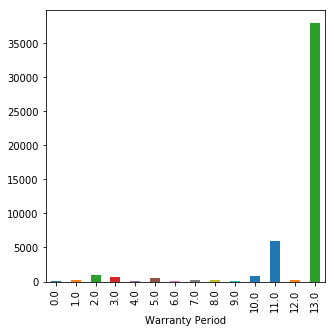

In [32]:
fig = plt.figure(figsize = (5,5))
mobile_wp.groupby(['Warranty Period'])['title'].count().plot.bar(ylim = 0)
plt.show()

In [33]:
mobile_wp.groupby('Warranty Period')['title'].count()

Warranty Period
0.0        78
1.0       215
2.0       909
3.0       738
4.0       100
5.0       496
6.0       102
7.0       187
8.0       273
9.0        90
10.0      840
11.0     5888
12.0      158
13.0    37999
Name: title, dtype: int64

In [34]:
#MultinomialNB

y = mobile_wp['Warranty Period']
X = mobile_wp['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.78
#recall is low for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.82
#recall is low for minority group 

#RandomForestClassifier

algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.82
#recall is the highest among 3 models

#Conclusion: Accuracy is comparable for all 3 models but Random Forest has higher recall for minority group.

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        30
        1.0       0.00      0.00      0.00        81
        2.0       0.41      0.31      0.35       367
        3.0       0.43      0.09      0.14       282
        4.0       0.75      0.23      0.35        40
        5.0       0.33      0.01      0.02       204
        6.0       0.00      0.00      0.00        45
        7.0       0.33      0.01      0.03        76
        8.0       0.00      0.00      0.00       101
        9.0       1.00      0.05      0.09        43
       10.0       0.52      0.16      0.25       341
       11.0       0.61      0.43      0.51      2342
       12.0       0.83      0.76      0.79        63
       13.0       0.86      0.96      0.91     15215

avg / total       0.79      0.83      0.80     19230
 



C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        30
        1.0       0.08      0.01      0.02        81
        2.0       0.67      0.41      0.51       367
        3.0       0.49      0.18      0.26       282
        4.0       0.70      0.70      0.70        40
        5.0       0.32      0.10      0.16       204
        6.0       0.38      0.07      0.11        45
        7.0       0.55      0.21      0.30        76
        8.0       0.29      0.10      0.15       101
        9.0       0.56      0.21      0.31        43
       10.0       0.70      0.27      0.39       341
       11.0       0.69      0.48      0.57      2342
       12.0       0.93      0.83      0.87        63
       13.0       0.88      0.97      0.92     15215

avg / total       0.82      0.85      0.83     19230
 

Random Forest Classifier
             precision    recall  f1-score   support

        0.0       0.11      0.03      0.05        30
     

In [35]:
A = mobile_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_test_rf = algo_rf.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_rf])
new=(df_from_arr.T)
new_1=new.rename({0:'Warranty Period'}, axis='columns')
mobile_test_7=pd.concat([mobile_test_6, new_1], axis=1)
mobile_test_7

itemid                                              title  \
0      1520485457        new promo iphone 5s 16gb gold ex resmi ibox   
1      1520516704          new promo xiaomi note 5a prime 3 32gb tam   
2      1520726573    big produk super murah oppo f5 4gb 32gb fullset   
3      1523303826              pocophone xiaomi f1 ram 6gb rom 128gb   
4      1524467616                                           advan g2   
5      1524876429                                  samsung galaxy a6   
6      1525744340  promo akhir bulan oppo f7 diamond black limite...   
7      1529179598                     vivo v9 pro ram 6gb rom 64gb 6   
8      1529634640  unik telephone panasonic wireless kx tg1611 bl...   
9      1529634708  promo telepon wireless panasonic kx tg1611 all...   
10     1535594128  big promo terbaru baru diskon 55 samsung galax...   
11     1536913818                               aldo al007 ht antena   
12     1537000139                   nokia 216 dual sim garansi resmi   
13     1539694249    promo samsung original galaxy s4 earphone white   
14     1539930818  promo hari jadi toko kami stock terbatas asus ...   
15     1539935384  promo hari jadi toko kami stock terbatas iphon...   
16     1541268292                   lcd asus t00n original padfone s   
17     1541736960  terlaris asli meizu m2 note 4g fdd lte dual si...   
18     1541759005                                      promo nokia 3   
19     1543195129                                advan s5e full view   
20     1544282937                       moshi iphone 6 6s sensecover   
21     1546128724  big sale laris iphone 6 16gb gold garansi dist...   
22     1548186789                                iphone 6s 64gb gold   
23     1549681613  bestproduct stainless connector adapter for sa...   
24     1551600002  usb cable lighting kabel data iphone 5 6 origi...   
25     1551898546                usb port penutup sony xperia z1 ori   
26     1555335464                                 xiomi redmi 5 3 32   
27     1557002061  anker powerline lightning mfi certified cable ...   
28     1557042701  handsfree headset earpods iphone 8 plus x orig...   
29     1557837884          promo xiaomi mi a2 androidone ready stock   
30     1557838999              promo hanphone samsung galaxy s8 plus   
31     1558648763                           oppo f5 ram 4gb rom 32gb   
32     1559974120  big promo diskon baruh bagi seluruh masyarakat...   
33     1560042892  asus zenfone max pro m1 ram 4 gb rom 64 zb602k...   
34     1561194619                     iphone se 64gb rosegold ios 12   
35     1563578542                                       oppo f9 4 64   
36     1564823605           diskon oppo f1s new ram 4gb rom64gb sale   
37     1565105758  produk original vivo v11 pro tempered glass fu...   
38     1565123263      diskon vivo v11 pro new garansi resmi 1 tahun   
39     1565156494  promo tempered glass vivo v11 6.41 inchi pro s...   
40     1566200897  best ever vivo v11 pro tempered glass 5d full ...   
41     1566949119                               brandcode b4s pro 3g   
42     1567543086                             iphone 6 orisinil 32gb   
43     1568276254       xiaomi redmi 5plus 4 64gb gold garansi resmi   
44     1568345533  goyang shopee diskon xiaomi notebook air 12 5i...   
45     1570877202  promo hari jadi toko kami stock terbatas iphon...   
46     1571047494  promo cuci gudang 2018 oppo r7 plus full set s...   
47     1571092100  promo cuci gudang 2018 one plus 3 a3003 ram 6 ...   
48     1571721786                     oppo a3s mlus like new ram 3gb   
49     1573078692                       advan vandroid g3 4 64gb lte   
50     1575376717           ready vivo v11 pro starry black original   
51     1576174616  wa 083136848777 0831 4044 8453 iphone 7 jetbla...   
52     1577252510  xiaomi pocophone f1 6gb 128gb garansi resmi 1 ...   
53     1580527306                samsung galaxy s5 resmi sein second   
54     1589770778                                  

# Storage Capacity

In [36]:
sc = ['title', 'Storage Capacity']

mobile_sc = mobile[sc]

#remove missing values
mobile_sc = mobile_sc[pd.notnull(mobile_sc['Storage Capacity'])]
mobile_sc = mobile_sc[['title', 'Storage Capacity']].sort_values('Storage Capacity')
mobile_sc_id = dict(mobile_sc.values)
mobile_sc.head()

title  Storage Capacity
62408                          iphone 7 black matte 128gb               1.0
134762  wa 083138611677 big promo beli 2 gratis 1 xiao...               1.0
30200                                      iphone 6 s ori               1.0
79506                                 iphone 6 128gb gold               1.0
134774  beli 2 bonus 1 gratis minat wa 083806884889 xi...               1.0

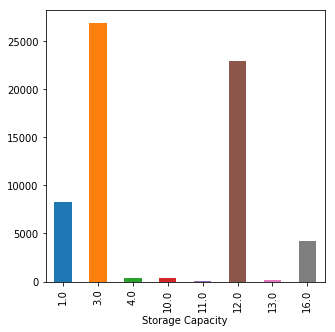

Storage Capacity
1.0      8264
3.0     26859
4.0       417
10.0      356
11.0       45
12.0    22895
13.0      129
16.0     4185
Name: title, dtype: int64

In [37]:
fig = plt.figure(figsize = (5,5))
mobile_sc.groupby(['Storage Capacity'])['title'].count().plot.bar(ylim = 0)
plt.show()
mobile_sc.groupby('Storage Capacity')['title'].count()

In [38]:
#MultinomialNB

y = mobile_sc['Storage Capacity']
X = mobile_sc['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.93
#recall is low for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.94
#recall is high for minority group 

#RandomForestClassifier

algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.94
#recall is the highest among 3 models

#Conclusion: Accuracy is comparable for all 3 models but LinearSVC has higher recall for minority group.

MULTINOMIAL NB
             precision    recall  f1-score   support

        1.0       0.93      0.90      0.92      3321
        3.0       0.93      0.95      0.94     10654
        4.0       0.90      0.33      0.48       184
       10.0       0.68      0.87      0.76       129
       11.0       0.50      0.15      0.23        20
       12.0       0.92      0.93      0.93      9163
       13.0       0.67      0.18      0.29        55
       16.0       0.93      0.84      0.88      1734

avg / total       0.92      0.92      0.92     25260
 

LinearSVC
             precision    recall  f1-score   support

        1.0       0.97      0.91      0.94      3321
        3.0       0.95      0.95      0.95     10654
        4.0       0.97      0.85      0.90       184
       10.0       0.98      0.94      0.96       129
       11.0       0.88      0.35      0.50        20
       12.0       0.92      0.96      0.94      9163
       13.0       0.92      0.62      0.74        55
       16.0    

In [39]:
A = mobile_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Storage Capacity'}, axis='columns')
mobile_test_8=pd.concat([mobile_test_7, new_1], axis=1)
mobile_test_8

itemid                                              title  \
0      1520485457        new promo iphone 5s 16gb gold ex resmi ibox   
1      1520516704          new promo xiaomi note 5a prime 3 32gb tam   
2      1520726573    big produk super murah oppo f5 4gb 32gb fullset   
3      1523303826              pocophone xiaomi f1 ram 6gb rom 128gb   
4      1524467616                                           advan g2   
5      1524876429                                  samsung galaxy a6   
6      1525744340  promo akhir bulan oppo f7 diamond black limite...   
7      1529179598                     vivo v9 pro ram 6gb rom 64gb 6   
8      1529634640  unik telephone panasonic wireless kx tg1611 bl...   
9      1529634708  promo telepon wireless panasonic kx tg1611 all...   
10     1535594128  big promo terbaru baru diskon 55 samsung galax...   
11     1536913818                               aldo al007 ht antena   
12     1537000139                   nokia 216 dual sim garansi resmi   
13     1539694249    promo samsung original galaxy s4 earphone white   
14     1539930818  promo hari jadi toko kami stock terbatas asus ...   
15     1539935384  promo hari jadi toko kami stock terbatas iphon...   
16     1541268292                   lcd asus t00n original padfone s   
17     1541736960  terlaris asli meizu m2 note 4g fdd lte dual si...   
18     1541759005                                      promo nokia 3   
19     1543195129                                advan s5e full view   
20     1544282937                       moshi iphone 6 6s sensecover   
21     1546128724  big sale laris iphone 6 16gb gold garansi dist...   
22     1548186789                                iphone 6s 64gb gold   
23     1549681613  bestproduct stainless connector adapter for sa...   
24     1551600002  usb cable lighting kabel data iphone 5 6 origi...   
25     1551898546                usb port penutup sony xperia z1 ori   
26     1555335464                                 xiomi redmi 5 3 32   
27     1557002061  anker powerline lightning mfi certified cable ...   
28     1557042701  handsfree headset earpods iphone 8 plus x orig...   
29     1557837884          promo xiaomi mi a2 androidone ready stock   
30     1557838999              promo hanphone samsung galaxy s8 plus   
31     1558648763                           oppo f5 ram 4gb rom 32gb   
32     1559974120  big promo diskon baruh bagi seluruh masyarakat...   
33     1560042892  asus zenfone max pro m1 ram 4 gb rom 64 zb602k...   
34     1561194619                     iphone se 64gb rosegold ios 12   
35     1563578542                                       oppo f9 4 64   
36     1564823605           diskon oppo f1s new ram 4gb rom64gb sale   
37     1565105758  produk original vivo v11 pro tempered glass fu...   
38     1565123263      diskon vivo v11 pro new garansi resmi 1 tahun   
39     1565156494  promo tempered glass vivo v11 6.41 inchi pro s...   
40     1566200897  best ever vivo v11 pro tempered glass 5d full ...   
41     1566949119                               brandcode b4s pro 3g   
42     1567543086                             iphone 6 orisinil 32gb   
43     1568276254       xiaomi redmi 5plus 4 64gb gold garansi resmi   
44     1568345533  goyang shopee diskon xiaomi notebook air 12 5i...   
45     1570877202  promo hari jadi toko kami stock terbatas iphon...   
46     1571047494  promo cuci gudang 2018 oppo r7 plus full set s...   
47     1571092100  promo cuci gudang 2018 one plus 3 a3003 ram 6 ...   
48     1571721786                     oppo a3s mlus like new ram 3gb   
49     1573078692                       advan vandroid g3 4 64gb lte   
50     1575376717           ready vivo v11 pro starry black original   
51     1576174616  wa 083136848777 0831 4044 8453 iphone 7 jetbla...   
52     1577252510  xiaomi pocophone f1 6gb 128gb garansi resmi 1 ...   
53     1580527306                samsung galaxy s5 resmi sein second   
54     1589770778                                  

# Color Family

In [40]:
cf = ['title', 'Color Family']

mobile_cf = mobile[cf]

#remove missing values
mobile_cf = mobile_cf[pd.notnull(mobile_cf['Color Family'])]
mobile_cf = mobile_cf[['title', 'Color Family']].sort_values('Color Family')
mobile_cf_id = dict(mobile_cf.values)
mobile_cf.head()

title  Color Family
80090   acc hp berkualitas best seller iphone5s iphone...           0.0
102873                  iphone 6 64gb gold second fuulset           0.0
124394                               oppo a7 ram 4gb gold           0.0
49742   minat chat di wa 083134045888 promo lagi cuci ...           0.0
86171                                           iphone 5s           0.0

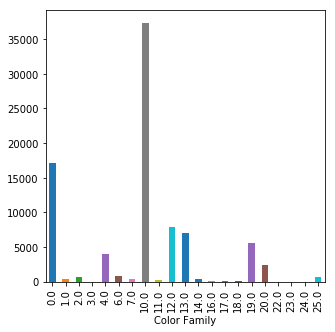

Color Family
0.0     17162
1.0       327
2.0       671
3.0         1
4.0      3917
6.0       848
7.0       384
10.0    37350
11.0      196
12.0     7883
13.0     6999
14.0      373
16.0       63
17.0       23
18.0       79
19.0     5596
20.0     2359
22.0        4
23.0        1
24.0        1
25.0      594
Name: title, dtype: int64

In [41]:
fig = plt.figure(figsize = (5,5))
mobile_cf.groupby(['Color Family'])['title'].count().plot.bar(ylim = 0)
plt.show()
mobile_cf.groupby('Color Family')['title'].count()

In [42]:
#MultinomialNB

y = mobile_sc['Storage Capacity']
X = mobile_sc['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.93
#recall is low for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.94
#recall is high for minority group 

#RandomForestClassifier

algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.94
#recall is the highest among 3 models

#Conclusion: Accuracy is comparable for all 3 models but LinearSVC has higher recall for minority group.

MULTINOMIAL NB
             precision    recall  f1-score   support

        1.0       0.93      0.90      0.92      3321
        3.0       0.93      0.95      0.94     10654
        4.0       0.90      0.33      0.48       184
       10.0       0.68      0.87      0.76       129
       11.0       0.50      0.15      0.23        20
       12.0       0.92      0.93      0.93      9163
       13.0       0.67      0.18      0.29        55
       16.0       0.93      0.84      0.88      1734

avg / total       0.92      0.92      0.92     25260
 

LinearSVC
             precision    recall  f1-score   support

        1.0       0.97      0.91      0.94      3321
        3.0       0.95      0.95      0.95     10654
        4.0       0.97      0.85      0.90       184
       10.0       0.98      0.94      0.96       129
       11.0       0.88      0.35      0.50        20
       12.0       0.92      0.96      0.94      9163
       13.0       0.92      0.62      0.74        55
       16.0    

In [43]:
A = mobile_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_test_rf = algo_rf.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_rf])
new=(df_from_arr.T)
new_1=new.rename({0:'Color Family'}, axis='columns')
mobile_test_9=pd.concat([mobile_test_8, new_1], axis=1)
mobile_test_9

itemid                                              title  \
0      1520485457        new promo iphone 5s 16gb gold ex resmi ibox   
1      1520516704          new promo xiaomi note 5a prime 3 32gb tam   
2      1520726573    big produk super murah oppo f5 4gb 32gb fullset   
3      1523303826              pocophone xiaomi f1 ram 6gb rom 128gb   
4      1524467616                                           advan g2   
5      1524876429                                  samsung galaxy a6   
6      1525744340  promo akhir bulan oppo f7 diamond black limite...   
7      1529179598                     vivo v9 pro ram 6gb rom 64gb 6   
8      1529634640  unik telephone panasonic wireless kx tg1611 bl...   
9      1529634708  promo telepon wireless panasonic kx tg1611 all...   
10     1535594128  big promo terbaru baru diskon 55 samsung galax...   
11     1536913818                               aldo al007 ht antena   
12     1537000139                   nokia 216 dual sim garansi resmi   
13     1539694249    promo samsung original galaxy s4 earphone white   
14     1539930818  promo hari jadi toko kami stock terbatas asus ...   
15     1539935384  promo hari jadi toko kami stock terbatas iphon...   
16     1541268292                   lcd asus t00n original padfone s   
17     1541736960  terlaris asli meizu m2 note 4g fdd lte dual si...   
18     1541759005                                      promo nokia 3   
19     1543195129                                advan s5e full view   
20     1544282937                       moshi iphone 6 6s sensecover   
21     1546128724  big sale laris iphone 6 16gb gold garansi dist...   
22     1548186789                                iphone 6s 64gb gold   
23     1549681613  bestproduct stainless connector adapter for sa...   
24     1551600002  usb cable lighting kabel data iphone 5 6 origi...   
25     1551898546                usb port penutup sony xperia z1 ori   
26     1555335464                                 xiomi redmi 5 3 32   
27     1557002061  anker powerline lightning mfi certified cable ...   
28     1557042701  handsfree headset earpods iphone 8 plus x orig...   
29     1557837884          promo xiaomi mi a2 androidone ready stock   
30     1557838999              promo hanphone samsung galaxy s8 plus   
31     1558648763                           oppo f5 ram 4gb rom 32gb   
32     1559974120  big promo diskon baruh bagi seluruh masyarakat...   
33     1560042892  asus zenfone max pro m1 ram 4 gb rom 64 zb602k...   
34     1561194619                     iphone se 64gb rosegold ios 12   
35     1563578542                                       oppo f9 4 64   
36     1564823605           diskon oppo f1s new ram 4gb rom64gb sale   
37     1565105758  produk original vivo v11 pro tempered glass fu...   
38     1565123263      diskon vivo v11 pro new garansi resmi 1 tahun   
39     1565156494  promo tempered glass vivo v11 6.41 inchi pro s...   
40     1566200897  best ever vivo v11 pro tempered glass 5d full ...   
41     1566949119                               brandcode b4s pro 3g   
42     1567543086                             iphone 6 orisinil 32gb   
43     1568276254       xiaomi redmi 5plus 4 64gb gold garansi resmi   
44     1568345533  goyang shopee diskon xiaomi notebook air 12 5i...   
45     1570877202  promo hari jadi toko kami stock terbatas iphon...   
46     1571047494  promo cuci gudang 2018 oppo r7 plus full set s...   
47     1571092100  promo cuci gudang 2018 one plus 3 a3003 ram 6 ...   
48     1571721786                     oppo a3s mlus like new ram 3gb   
49     1573078692                       advan vandroid g3 4 64gb lte   
50     1575376717           ready vivo v11 pro starry black original   
51     1576174616  wa 083136848777 0831 4044 8453 iphone 7 jetbla...   
52     1577252510  xiaomi pocophone f1 6gb 128gb garansi resmi 1 ...   
53     1580527306                samsung galaxy s5 resmi sein second   
54     1589770778                                  

# Camera

In [44]:
ca = ['title', 'Camera']
mobile_ca = mobile[ca]

#remove missing values
mobile_ca = mobile_ca[pd.notnull(mobile_ca['Camera'])]
mobile_ca = mobile_ca[['title', 'Camera']].sort_values('Camera')
mobile_ca_id = dict(mobile_ca.values)
mobile_ca.head()

title  Camera
155649             promo sony alpha 7r mark ii     0.0
136588   promo sony a7r mark ii a7 r mk2 a7rii     0.0
43339       sony a7r mark ii limited buy 1 get     0.0
92106                         oppo a3s ram 2gb     1.0
128168  samsung a8 2018 second mulus grs resmi     1.0

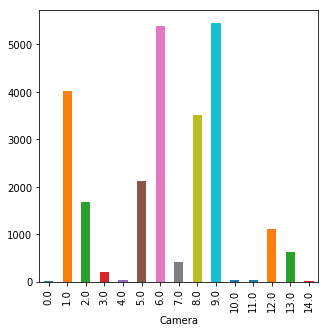

Camera
0.0        3
1.0     4008
2.0     1668
3.0      211
4.0       31
5.0     2129
6.0     5379
7.0      415
8.0     3501
9.0     5456
10.0      23
11.0      28
12.0    1109
13.0     623
14.0       6
Name: title, dtype: int64

In [45]:
fig = plt.figure(figsize = (5,5))
mobile_ca.groupby(['Camera'])['title'].count().plot.bar(ylim = 0)
plt.show()
mobile_ca.groupby('Camera')['title'].count()

In [46]:
#MultinomialNB

y = mobile_ca['Camera']
X = mobile_ca['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.61
#recall is low for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.67
#recall is higher for minority group 

#RandomForestClassifier

algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.64
#recall is the highest among 3 models

#Conclusion: Accuracy is comparable for all 3 models but only RandomForest has one minority group has 0 recall (best).

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         1
        1.0       0.57      0.51      0.54      1599
        2.0       0.62      0.35      0.45       666
        3.0       0.96      0.33      0.49        80
        4.0       0.00      0.00      0.00        14
        5.0       0.65      0.34      0.44       888
        6.0       0.62      0.67      0.65      2145
        7.0       0.50      0.02      0.04       165
        8.0       0.57      0.69      0.62      1411
        9.0       0.57      0.82      0.68      2168
       10.0       0.00      0.00      0.00         7
       11.0       0.00      0.00      0.00        12
       12.0       0.73      0.52      0.61       446
       13.0       0.75      0.24      0.36       229
       14.0       0.00      0.00      0.00         5

avg / total       0.60      0.60      0.58      9836
 



C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00         1
        1.0       0.63      0.55      0.59      1599
        2.0       0.65      0.49      0.56       666
        3.0       0.90      0.59      0.71        80
        4.0       1.00      0.50      0.67        14
        5.0       0.59      0.49      0.53       888
        6.0       0.71      0.73      0.72      2145
        7.0       0.62      0.43      0.51       165
        8.0       0.62      0.74      0.68      1411
        9.0       0.67      0.79      0.72      2168
       10.0       0.14      0.14      0.14         7
       11.0       0.43      0.25      0.32        12
       12.0       0.77      0.65      0.70       446
       13.0       0.59      0.48      0.53       229
       14.0       0.00      0.00      0.00         5

avg / total       0.66      0.66      0.65      9836
 

Random Forest Classifier
             precision    recall  f1-score   support

     

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
A = mobile_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_test_rf = algo_rf.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_rf])
new=(df_from_arr.T)
new_1=new.rename({0:'Camera'}, axis='columns')
mobile_test_10=pd.concat([mobile_test_9, new_1], axis=1)
mobile_test_10

itemid                                              title  \
0      1520485457        new promo iphone 5s 16gb gold ex resmi ibox   
1      1520516704          new promo xiaomi note 5a prime 3 32gb tam   
2      1520726573    big produk super murah oppo f5 4gb 32gb fullset   
3      1523303826              pocophone xiaomi f1 ram 6gb rom 128gb   
4      1524467616                                           advan g2   
5      1524876429                                  samsung galaxy a6   
6      1525744340  promo akhir bulan oppo f7 diamond black limite...   
7      1529179598                     vivo v9 pro ram 6gb rom 64gb 6   
8      1529634640  unik telephone panasonic wireless kx tg1611 bl...   
9      1529634708  promo telepon wireless panasonic kx tg1611 all...   
10     1535594128  big promo terbaru baru diskon 55 samsung galax...   
11     1536913818                               aldo al007 ht antena   
12     1537000139                   nokia 216 dual sim garansi resmi   
13     1539694249    promo samsung original galaxy s4 earphone white   
14     1539930818  promo hari jadi toko kami stock terbatas asus ...   
15     1539935384  promo hari jadi toko kami stock terbatas iphon...   
16     1541268292                   lcd asus t00n original padfone s   
17     1541736960  terlaris asli meizu m2 note 4g fdd lte dual si...   
18     1541759005                                      promo nokia 3   
19     1543195129                                advan s5e full view   
20     1544282937                       moshi iphone 6 6s sensecover   
21     1546128724  big sale laris iphone 6 16gb gold garansi dist...   
22     1548186789                                iphone 6s 64gb gold   
23     1549681613  bestproduct stainless connector adapter for sa...   
24     1551600002  usb cable lighting kabel data iphone 5 6 origi...   
25     1551898546                usb port penutup sony xperia z1 ori   
26     1555335464                                 xiomi redmi 5 3 32   
27     1557002061  anker powerline lightning mfi certified cable ...   
28     1557042701  handsfree headset earpods iphone 8 plus x orig...   
29     1557837884          promo xiaomi mi a2 androidone ready stock   
30     1557838999              promo hanphone samsung galaxy s8 plus   
31     1558648763                           oppo f5 ram 4gb rom 32gb   
32     1559974120  big promo diskon baruh bagi seluruh masyarakat...   
33     1560042892  asus zenfone max pro m1 ram 4 gb rom 64 zb602k...   
34     1561194619                     iphone se 64gb rosegold ios 12   
35     1563578542                                       oppo f9 4 64   
36     1564823605           diskon oppo f1s new ram 4gb rom64gb sale   
37     1565105758  produk original vivo v11 pro tempered glass fu...   
38     1565123263      diskon vivo v11 pro new garansi resmi 1 tahun   
39     1565156494  promo tempered glass vivo v11 6.41 inchi pro s...   
40     1566200897  best ever vivo v11 pro tempered glass 5d full ...   
41     1566949119                               brandcode b4s pro 3g   
42     1567543086                             iphone 6 orisinil 32gb   
43     1568276254       xiaomi redmi 5plus 4 64gb gold garansi resmi   
44     1568345533  goyang shopee diskon xiaomi notebook air 12 5i...   
45     1570877202  promo hari jadi toko kami stock terbatas iphon...   
46     1571047494  promo cuci gudang 2018 oppo r7 plus full set s...   
47     1571092100  promo cuci gudang 2018 one plus 3 a3003 ram 6 ...   
48     1571721786                     oppo a3s mlus like new ram 3gb   
49     1573078692                       advan vandroid g3 4 64gb lte   
50     1575376717           ready vivo v11 pro starry black original   
51     1576174616  wa 083136848777 0831 4044 8453 iphone 7 jetbla...   
52     1577252510  xiaomi pocophone f1 6gb 128gb garansi resmi 1 ...   
53     1580527306                samsung galaxy s5 resmi sein second   
54     1589770778                                  

# Phone Screen Size

In [48]:
pss = ['title', 'Phone Screen Size']
mobile_pss = mobile[pss]

#remove missing values
mobile_pss = mobile_pss[pd.notnull(mobile_pss['Phone Screen Size'])]
mobile_pss = mobile_pss[['title', 'Phone Screen Size']].sort_values('Phone Screen Size')
mobile_pss_id = dict(mobile_pss.values)
mobile_pss.head()

title  Phone Screen Size
23343      termurah lenovo a7000 bonus special otg to usb                0.0
109619  huawei tag l32 gr3 smart touch gold 2 16gb gra...                0.0
58465   wa 082290481322 promo samsung j2 prime bonus a...                0.0
109610                         iphone 7 32 gb matte black                0.0
134467  sony xperia m4 aqua e2353 dual sim second fullset                0.0

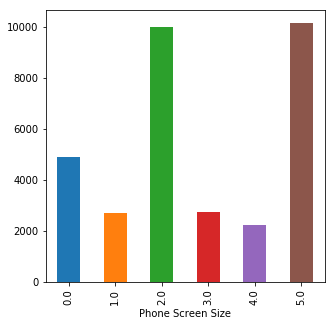

Phone Screen Size
0.0     4880
1.0     2707
2.0     9991
3.0     2733
4.0     2233
5.0    10150
Name: title, dtype: int64

In [49]:
fig = plt.figure(figsize = (5,5))
mobile_pss.groupby(['Phone Screen Size'])['title'].count().plot.bar(ylim = 0)
plt.show()
mobile_pss.groupby('Phone Screen Size')['title'].count()

In [50]:
#MultinomialNB

y = mobile_pss['Phone Screen Size']
X = mobile_pss['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.65

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.73

#RandomForestClassifier

algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.72

#Conclusion: LinearSVC has higher accuracy and recall.

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.59      0.49      0.53      1960
        1.0       0.70      0.40      0.51      1085
        2.0       0.60      0.74      0.66      3955
        3.0       0.62      0.45      0.52      1079
        4.0       0.69      0.43      0.53       911
        5.0       0.66      0.75      0.70      4088

avg / total       0.64      0.63      0.62     13078
 

LinearSVC
             precision    recall  f1-score   support

        0.0       0.66      0.64      0.65      1960
        1.0       0.74      0.60      0.66      1085
        2.0       0.70      0.76      0.73      3955
        3.0       0.68      0.62      0.65      1079
        4.0       0.74      0.51      0.61       911
        5.0       0.74      0.80      0.77      4088

avg / total       0.71      0.71      0.71     13078
 

Random Forest Classifier
             precision    recall  f1-score   support

        0.0       0.64      0.64      

### Final conclusion on train model that work best for each attributes: LinearSVC
**Choose based on which model can give best recall score to most of the minority group (Accuracy is quite comparable between models)
1. Operating System - LinearSVC 
2. Features - LinearSVC 
3. Network Connections - LinearSVC 
4. Memory RAM - LinearSVC 
5. Brand  - LinearSVC 
6. Warranty Period - Random Forest
7. Storage Capacity - LinearSVC 
8. Color Family - Random Forest
9. Phone Model (too many categories to verify)
10. Camera - Random Forest
11. Phone Screen Size - LinearSVC 

In [51]:
A = mobile_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Phone Screen Size'}, axis='columns')
mobile_test_11=pd.concat([mobile_test_10, new_1], axis=1)
mobile_test_11

itemid                                              title  \
0      1520485457        new promo iphone 5s 16gb gold ex resmi ibox   
1      1520516704          new promo xiaomi note 5a prime 3 32gb tam   
2      1520726573    big produk super murah oppo f5 4gb 32gb fullset   
3      1523303826              pocophone xiaomi f1 ram 6gb rom 128gb   
4      1524467616                                           advan g2   
5      1524876429                                  samsung galaxy a6   
6      1525744340  promo akhir bulan oppo f7 diamond black limite...   
7      1529179598                     vivo v9 pro ram 6gb rom 64gb 6   
8      1529634640  unik telephone panasonic wireless kx tg1611 bl...   
9      1529634708  promo telepon wireless panasonic kx tg1611 all...   
10     1535594128  big promo terbaru baru diskon 55 samsung galax...   
11     1536913818                               aldo al007 ht antena   
12     1537000139                   nokia 216 dual sim garansi resmi   
13     1539694249    promo samsung original galaxy s4 earphone white   
14     1539930818  promo hari jadi toko kami stock terbatas asus ...   
15     1539935384  promo hari jadi toko kami stock terbatas iphon...   
16     1541268292                   lcd asus t00n original padfone s   
17     1541736960  terlaris asli meizu m2 note 4g fdd lte dual si...   
18     1541759005                                      promo nokia 3   
19     1543195129                                advan s5e full view   
20     1544282937                       moshi iphone 6 6s sensecover   
21     1546128724  big sale laris iphone 6 16gb gold garansi dist...   
22     1548186789                                iphone 6s 64gb gold   
23     1549681613  bestproduct stainless connector adapter for sa...   
24     1551600002  usb cable lighting kabel data iphone 5 6 origi...   
25     1551898546                usb port penutup sony xperia z1 ori   
26     1555335464                                 xiomi redmi 5 3 32   
27     1557002061  anker powerline lightning mfi certified cable ...   
28     1557042701  handsfree headset earpods iphone 8 plus x orig...   
29     1557837884          promo xiaomi mi a2 androidone ready stock   
30     1557838999              promo hanphone samsung galaxy s8 plus   
31     1558648763                           oppo f5 ram 4gb rom 32gb   
32     1559974120  big promo diskon baruh bagi seluruh masyarakat...   
33     1560042892  asus zenfone max pro m1 ram 4 gb rom 64 zb602k...   
34     1561194619                     iphone se 64gb rosegold ios 12   
35     1563578542                                       oppo f9 4 64   
36     1564823605           diskon oppo f1s new ram 4gb rom64gb sale   
37     1565105758  produk original vivo v11 pro tempered glass fu...   
38     1565123263      diskon vivo v11 pro new garansi resmi 1 tahun   
39     1565156494  promo tempered glass vivo v11 6.41 inchi pro s...   
40     1566200897  best ever vivo v11 pro tempered glass 5d full ...   
41     1566949119                               brandcode b4s pro 3g   
42     1567543086                             iphone 6 orisinil 32gb   
43     1568276254       xiaomi redmi 5plus 4 64gb gold garansi resmi   
44     1568345533  goyang shopee diskon xiaomi notebook air 12 5i...   
45     1570877202  promo hari jadi toko kami stock terbatas iphon...   
46     1571047494  promo cuci gudang 2018 oppo r7 plus full set s...   
47     1571092100  promo cuci gudang 2018 one plus 3 a3003 ram 6 ...   
48     1571721786                     oppo a3s mlus like new ram 3gb   
49     1573078692                       advan vandroid g3 4 64gb lte   
50     1575376717           ready vivo v11 pro starry black original   
51     1576174616  wa 083136848777 0831 4044 8453 iphone 7 jetbla...   
52     1577252510  xiaomi pocophone f1 6gb 128gb garansi resmi 1 ...   
53     1580527306                samsung galaxy s5 resmi sein second   
54     1589770778                                  

In [52]:
export_csv = mobile_test_11.to_csv (r'C:/Users/gayus/OneDrive/Desktop/Master Course/NDSC/mobile_data_info_val_competition_finalised.csv', index = None, header=True) 
#Don't forget to add '.csv' at the end of the path